<h1>K Nearest Neighbors</h1>

<h3>Basic info:</h3>
<li> Algorithm classifies new objects based on class of majority and k of his closest neighbors.
<li> It's example of supervised learning.
<li> It's really simply method but it isn't fast so it may not be best choice when dealing with a lot of data.
<li> It works in multi dimensional datasets.

<h3>How to choose k value</h3>
<li> k should be even number if number of classes is odd. Otherwise k should be even.
<li> k should be greater than number of classes.

<h3>Alternative metrics</h3>
<li> Euclidean distance
<li> Manhattan distance




<h2>Import stuff</h2>

In [74]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd

<h4> Configure matplotlib </h4>

In [72]:
plt.rcParams['figure.figsize'] = [12, 8]

<h2>Implementing metrics</h2>

Euclidean metrics:
$$
  d = \sqrt{(a_1 - b_1)^2 + (a_2 - b_2)^2 + \ldots + (a_n - b_n)^2 }
$$

In [2]:
def EuclideanMetrics(p1, p2) -> float:
    d = 0
    for a, b in zip(p1,p2):
        d += (a - b) ** 2
    return np.sqrt(d)

<h4> Manhattan metrics </h4>

$$
d = \sum^n_{i=0}|p1_i - p2_i|
$$

In [3]:
def ManhattanMetrics(p1, p2) -> float:
    d = 0
    for a, b in zip (p1, p2):
        d += np.abs(a - b)
    return d


<h3> Normalization </h3>
<p>Normalization, in this case, is scaling data to range [0, 1]. It highly improves prediction accuracy of KNN algorithm.</p>

$$
    x_{normalized} = \frac{x - x_{min}}{x_{max} - x_{min} }
$$

In [53]:
def normalize(X):
    X_norm= (X - np.min(X, axis=0))/(np.max(X, axis=0) - np.min(X, axis=0))
    return X_norm

<h3>Split data </h3>
This function let us to split our dataset between train and test parts. This let us check accuracy of our algorithm

In [51]:
def train_test_split(X, y, train_ratio=0.75, seed=0):
    m = X.shape[0] # count of rows in data

    np.random.seed(seed)
    idx_perm = np.random.permutation(m)
    
    X = X[idx_perm]
    y = y[idx_perm]

    index = int(np.round(train_ratio * m))
    
    X_train = X[:index, :]
    X_test = X[index:, :] 
    y_train = y[:index]
    y_test = y[index:]
    return X_train, X_test, y_train, y_test

<h1>My KNN class

In [56]:
class KNN():
    def __init__(self, k=5, metric='Euclidean'):
        self.k_ = k
        self.metric_ = metric
    
    def fit(self, X, y):
        self.X_ = X.copy()
        self.y_ = y.copy()

    def predict(self, X) -> np.ndarray:
        predicted_values = []
        for x in X:
            # Calculate distance between x and trained points 
            distances = self.dist(x)
            # Sort all objects in X_ by distance to x 
            # and select k of them that are the closest to x
            closest_idx = np.argsort(distances)[:self.k_]
            # Return class that has majority of them
            predicted_values.append(max(self.y_[closest_idx]))
        return np.array(predicted_values)

    def dist(self, x) -> list:
        distances = []
        for x_trained in self.X_:
            if self.metric_ == "Euclidean":
                distances.append(EuclideanMetrics(x, x_trained))
            elif self.metric_ == "Manhattan":
                distances.append(ManhattanMetrics(x, x_trained))
        return distances
    
    def score(self, X, y):
        y_predicted = self.predict(X)
        return sum(y_predicted == y)/len(y)




In [33]:
knn = KNN(k=3)
X = [[0], [1], [2], [1], [7], [8], [7], [8]]
y = [0, 0, 0, 0, 1, 1, 1, 1]
X = np.array(X)
y = np.array(y)

[0.]


<h1>Examples</h1>

<h3>Classification Iris dataset<h3>

Firstly I'm gonna load Iris dataset, choose two features from there and normalize values.

Text(0.5, 1.0, 'Scattered plot of my train data by those two features')

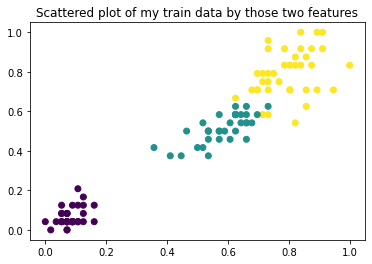

In [66]:
iris = datasets.load_iris()

X = iris.data[:, 2:4]  # for now I'll use only two features - just to simplify visualization
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X,y, seed=0)
X_train = normalize(X_train)
X_test = normalize(X_test)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.title("Scattered plot of my train data by those two features")

Score of predict from training data: 0.9821428571428571
Score of predict from test data: 0.9473684210526315


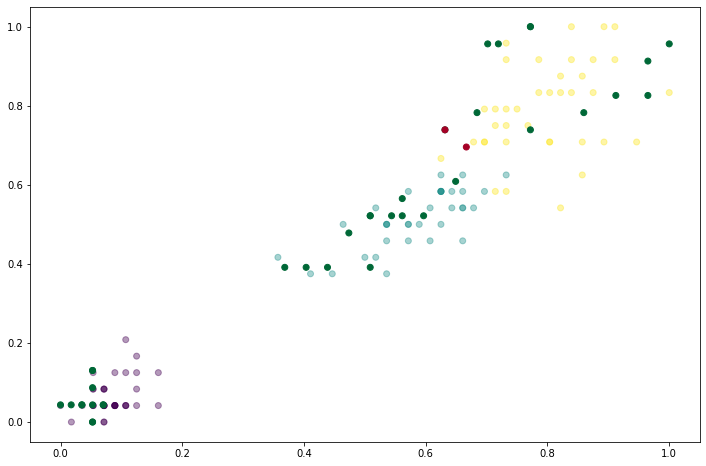

In [71]:
knn = KNN()
knn.fit(X_train, y_train)
train_score = knn.score(X_train, y_train)
print(f"Score of predict from training data: {train_score}")
test_score = knn.score(X_test, y_test)
print(f"Score of predict from test data: {test_score}")

y_predicted = knn.predict(X_test)
is_prediction_accurate = (y_predicted == y_test)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha = 0.4)
plt.scatter(X_test[:, 0], X_test[:, 1], c=is_prediction_accurate, cmap="RdYlGn")


<p> Transparent points are points I trained my model with. Non-transparend dots are classified points from test data. Objects classified correctly are green, ottherwise they're red.

<h3>Bibliography</h3>
<li> https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
<li>https://en.wikipedia.org/wiki/Taxicab_geometry
<li>https://aszokalski.github.io/AI/KNN.html
<li>Data Science Algorithms in a Week, Dávid Natingga, Packt